In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import geopy.distance
files = ["201909-citibike-tripdata.csv"]
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs)

In [2]:
df = df.drop(df.index[(df['tripduration'] > 7200)])
df = df[(df['birth year'] < 2000) & (df['birth year'] > 1970)]
earlyrides = df[(df.starttime.str[11:13].isin(['07', '08'])) & (df.tripduration < 2400)].copy()

In [3]:
mdf = earlyrides[earlyrides.gender == 1]
wdf = earlyrides[earlyrides.gender == 2]

In [4]:
def topstations(df, n):
    top = pd.DataFrame() 
    top['Station']=df['end station name'].value_counts().head(n).index
    top['Number of Arrivals']=df['end station name'].value_counts().head(n).values
    top['Station'] = top['Station'].astype('object')
    ax = sns.barplot('Station', 'Number of Arrivals', data = top, palette="GnBu_d")
    ax.set_title('Top Citi Bike Stations', fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
    padding = 0.1 * top['Number of Arrivals'].max()
    for index, row in top.iterrows():
        ax.text(index,row['Number of Arrivals']-padding,row['Number of Arrivals'], 
                color='white', ha="center", fontsize = 10)
    plt.show()

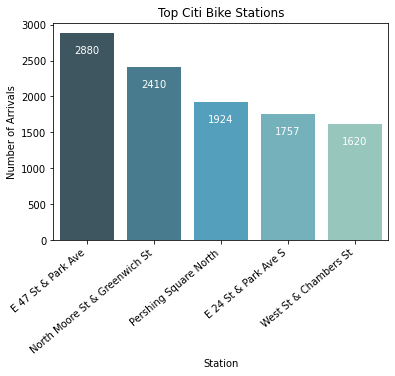

In [5]:
topstations(mdf, 5)

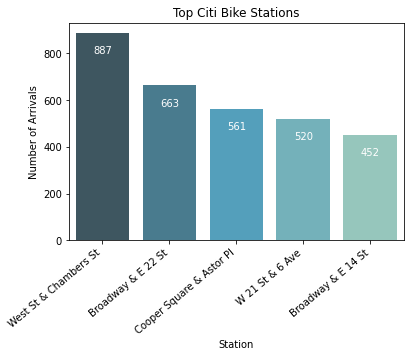

In [6]:
topstations(wdf, 5)

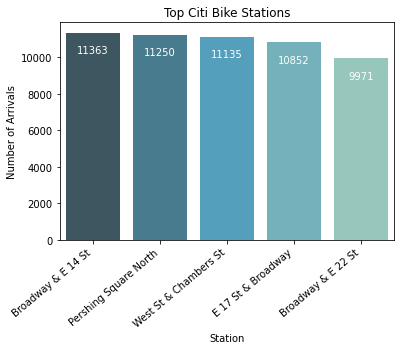

In [7]:
topstations(df, 5)